# PHÂN TÍCH DỮ LIỆU BANK MARKETING VÀ ỨNG DỤNG MÔ HÌNH PHÂN LỚP TRONG DỰ ĐOÁN KHÁCH HÀNG CÓ KHẢ NĂNG MỞ SỔ TIẾT KIỆM HAY KHÔNG

**<h4>1.Thu thập dữ liệu (Data collection)</h4>**
**<h4>2.Chuẩn bị dữ liệu (Data preparation)</h4>**
**<h4>3.Lựa chọn mô hình phù hợp (Choosing a model)</h4>**
**<h4>4.Huấn luyện mô hình (Training)</h4>**
**<h4>5.Đánh giá mô hình (Evaluation)</h4>**
**<h4>6.Tùy chỉnh tham số của mô hình (Parameter tuning)</h4>**
**<h4>7.Dự đoán với với mô hình xây dựng được (Prediction)</h4>**

## Bước 1.Thu thập dữ liệu (Data collection):
---


**Mô tả tập dữ liệu thu thập được phục vụ bài toán:**
- Tên Dataset: **bank.csv**
- File dữ liệu chứa thông tin của **300 bệnh nhân bị bệnh đau ngực**
- Mỗi dòng ứng với thông tin của một bệnh nhân, bao gồm 17 thuộc tính:
     - *age: tuổi
     - *job: nghề nghiệp (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')*
     - *marital: tình trạng hôn nhân (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)*
     - *education: học vấn (categorical: primary, secondary, tertiary and unknown)*
     - *default: có khoản tín dụng (categorical: 'no','yes','unknown')*
     - *balance: chỉ số cân bằng tài chính*
     - *housing: có vay mua nhà hay không (categorical: 'no','yes','unknown')*
     - *loan: có khoản nợ cá nhân (categorical: 'no','yes','unknown')*
     - *contact: liên hệ qua điện thoại bàn hoặc cellphone (categorical: 'cellular','telephone')*
     - *day: ngày liên hệ cuối cùng trong tuần(categorical: 'mon','tue','wed','thu','fri')*
     - *month: tháng liên hệ cuối cùng trong năm (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')*
     - *duration: thời gian cuộc gọi cuối cùng*
     - *campaign: số lần liên hệ cho khách hàng trong suốt chiến dịch quảng cáo*
     - *pdays: số ngày trôi qua sau khi khách được liên hệ từ khách hàng trước, nếu = 999 thì khách chưa được liên hệ trước đó*
     - *previous: số lần liên hệ thực hiện trước chiến dịch này*
     - *poutcome: kết quả của chiến lược trước đó (categorical: 'failure','nonexistent','success')*
     - *deposit: target, output value là khách hàng có mở sổ tiết kiệm hay không (có, không)*
     

In [34]:
import pandas as pd
from plotly import tools
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
raw_data = pd.read_csv('bank.csv')

In [36]:
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Bước 2: Chuẩn bị dữ liệu (Data Preparation)

In [37]:
raw_data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [38]:
raw_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [39]:
raw_data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

### Tuổi trung bình là 41 (cao nhất là 95 và thấp nhất là 18)
### Số dư TK trung bình là 1528. Tuy nhiên độ lệch chuẩn lớn nên số dư phân bố rộng quanh giá trị trung bình


In [40]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### => Dữ liệu không chứa missing value

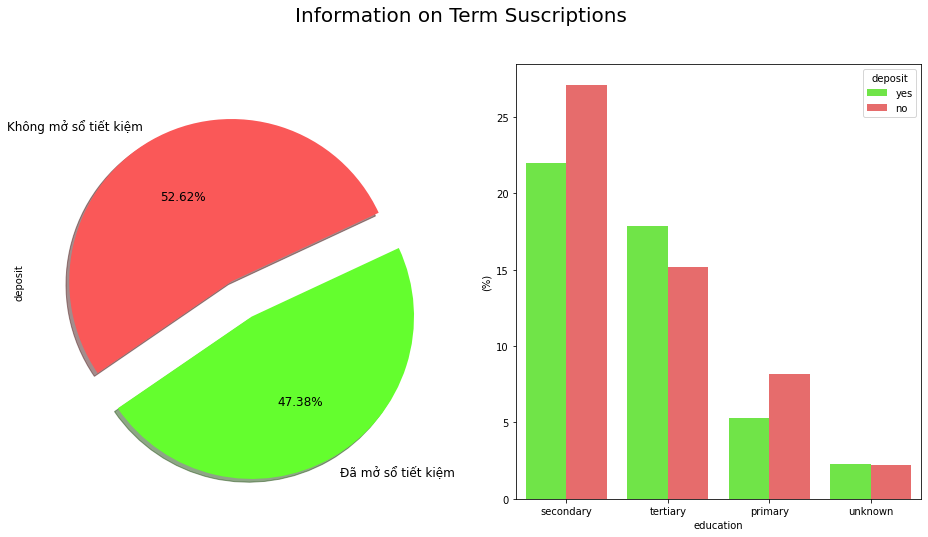

In [41]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#FA5858", "#64FE2E"]
plt.suptitle('Information on Term Suscriptions', fontsize=20)
labels ="Không mở sổ tiết kiệm", "Đã mở sổ tiết kiệm"
raw_data["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

palette = ["#64FE2E", "#FA5858"]
sns.barplot(x="education", y="balance", hue="deposit", data=raw_data, palette=palette, estimator=lambda x: len(x) / len(raw_data) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(raw_data["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

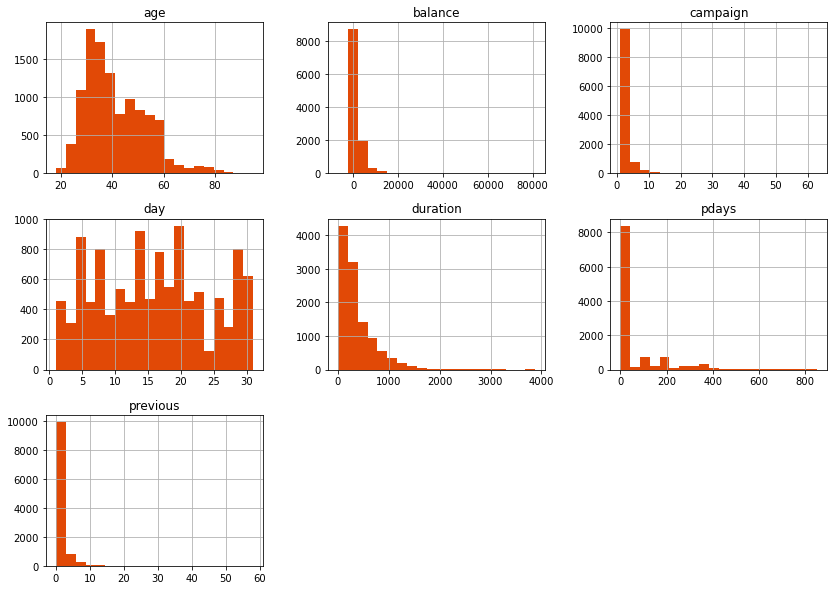

In [42]:
raw_data.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

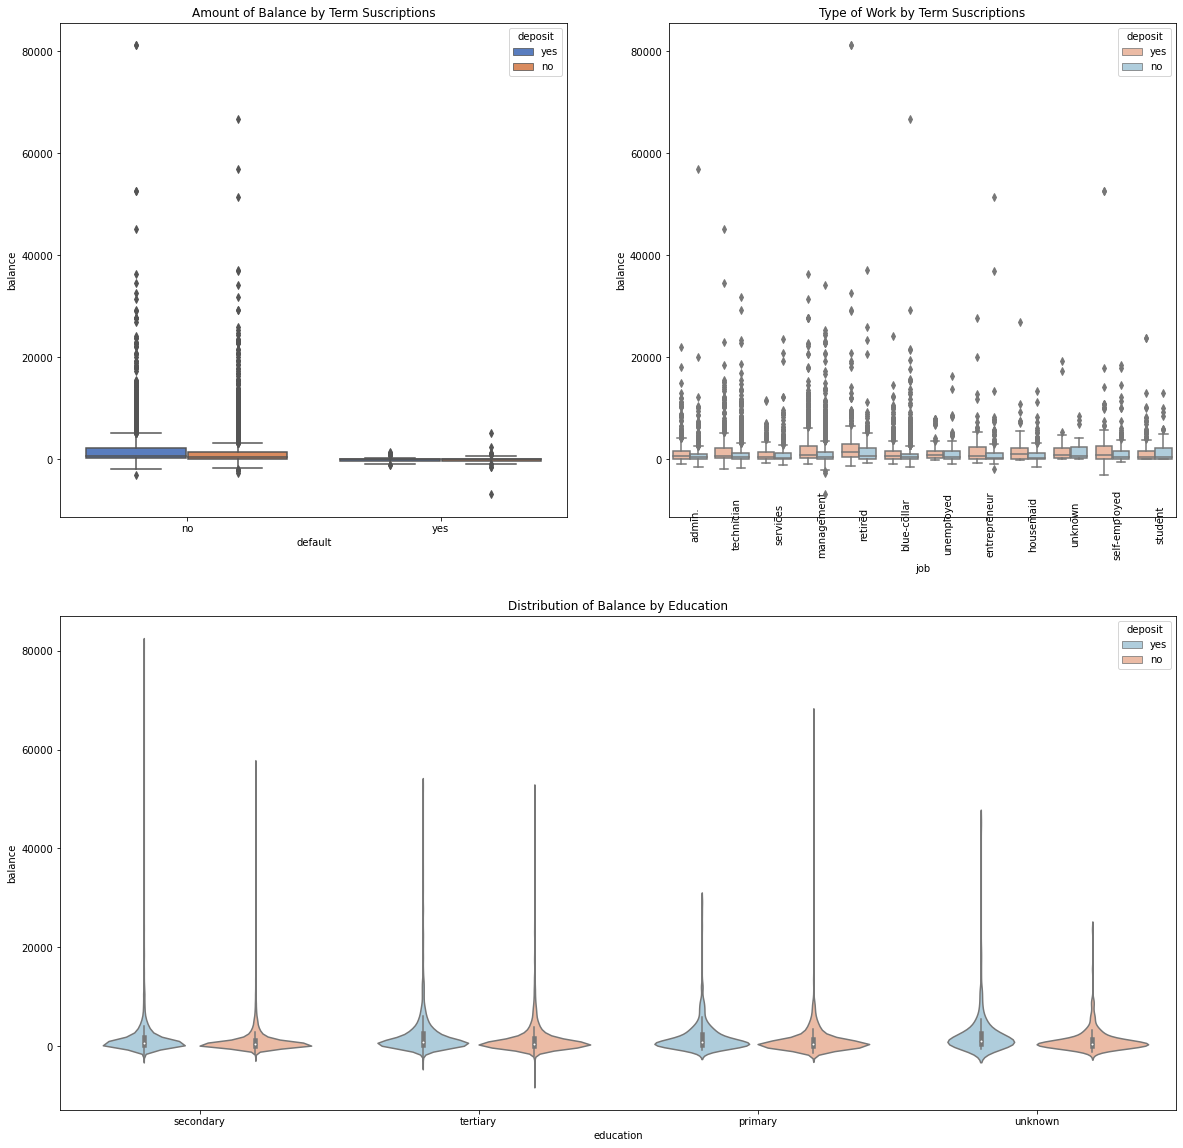

In [43]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=raw_data, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=raw_data, palette="RdBu", ax=ax2)

g1.set_xticklabels(raw_data["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=raw_data, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [44]:
### Nhận xét:
